In [1]:
#(1) 데이터 가져오기
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target


In [22]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["MEDV"])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [3]:
#(2) 모델에 입력할 데이터 x 준비하기
X = df_X.to_numpy()

In [4]:
#(3) 모델에 예측할 데이터 y 준비하기
y = df_y.to_numpy()

In [5]:
#(4) train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
#(5) 모델 준비하기
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
#(6) 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
#(7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


In [9]:
#(8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.0001


In [10]:
#(9) 모델 학습하기

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
        

In [11]:
#(10) test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

18896.811577772438

In [14]:
#너무 커서 learning rate 증가
LEARNING_RATE = 0.001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3820.948880022584

In [15]:
# 그래도 커서 다시 증가
LEARNING_RATE = 0.01

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2866.2029123640955

In [45]:
# X컬럼 변경해 보기
df_X = df_X[[
    'age', 'sex', 'bmi', 'bp', 's1'
]]

X = df_X.to_numpy()
y = df_y.to_numpy()

#X = diabetes.data
#y = diabetes.target

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
#                                                    test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [37]:
W = np.random.rand(5)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(5):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

LEARNING_RATE = 0.0001
losses = []

for i in range(1, 1001):
#    dW, db = gradient(X_train, W, b, y_train)
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [1]:
# 프로젝트2: 날씨 좋은 월요일 오후 세시, 자전거 타는 사람은 몇명?
#(1) 데이터 가져오기
import pandas as pd

bikes = pd.read_csv('~/aiffel/bike_regression/data/train.csv')


In [5]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"])

In [6]:
bikes["year"] = bikes["datetime"].dt.year
bikes["month"] = bikes["datetime"].dt.month
bikes["day"] = bikes["datetime"].dt.day
bikes["hour"] = bikes["datetime"].dt.hour
bikes["minute"] = bikes["datetime"].dt.minute
bikes["second"] = bikes["datetime"].dt.second


In [60]:
#(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
bikes.insert(12, 'year', bikes['datetime'].dt.year)
bikes.insert(13, 'month', bikes['datetime'].dt.month)
bikes.insert(14, 'day', bikes['datetime'].dt.day)
bikes.insert(15, 'hour', bikes['datetime'].dt.hour)
bikes.insert(16, 'minute', bikes['datetime'].dt.minute)
bikes.insert(17, 'second', bikes['datetime'].dt.second)

<AxesSubplot:xlabel='second', ylabel='count'>

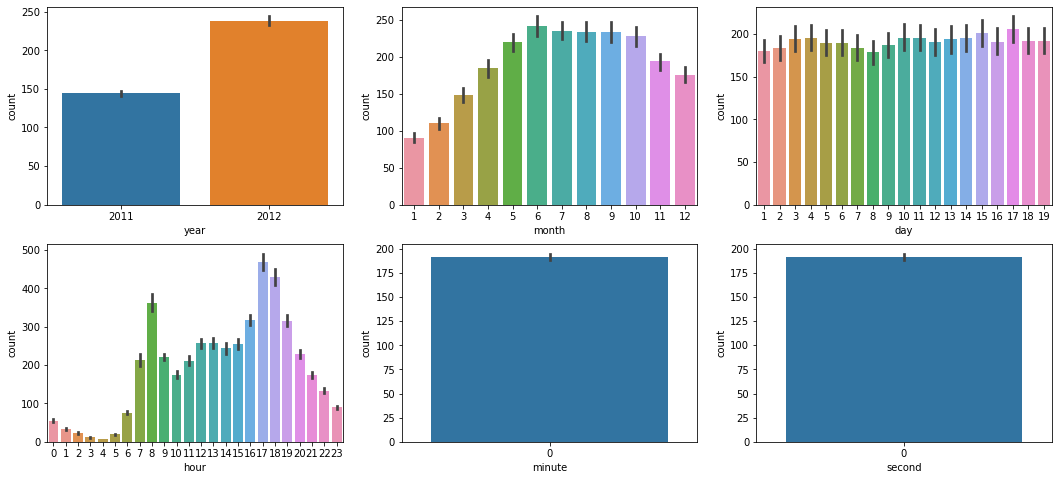

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=bikes, x="year", y="count", ax=ax1)
sns.barplot(data=bikes, x="month", y="count", ax=ax2)
sns.barplot(data=bikes, x="day", y="count", ax=ax3)
sns.barplot(data=bikes, x="hour", y="count", ax=ax4)
sns.barplot(data=bikes, x="minute", y="count", ax=ax5)
sns.barplot(data=bikes, x="second", y="count", ax=ax6)

In [13]:
#(4) X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split

X = bikes[["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "month", "day", "hour"]]
y = bikes[["count"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(8708, 12) (8708, 1)
(2178, 12) (2178, 1)


In [14]:
#(5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
predictions = model.predict(X_test)
predictions



array([[248.10627003],
       [ 48.79765547],
       [200.90676727],
       ...,
       [309.7528022 ],
       [ 38.17030198],
       [243.62697388]])

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

19945.3700537534

In [24]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
3133,3,0,1,1,33.62,40.150,59,0.0000,2011,7,19,11
5786,1,1,0,1,4.10,6.820,54,6.0032,2012,1,16,6
5224,4,0,0,1,9.84,11.365,48,12.9980,2011,12,11,18
8953,3,0,1,2,29.52,34.090,62,12.9980,2012,8,15,10
8054,2,0,1,1,25.42,31.060,53,16.9979,2012,6,15,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23.78,27.275,49,19.0012,2011,5,8,17
5807,1,0,1,3,13.12,15.150,66,22.0028,2012,1,17,4
10061,4,0,0,1,16.40,20.455,40,12.9980,2012,11,4,14
5427,1,0,0,1,11.48,14.395,81,7.0015,2012,1,1,5


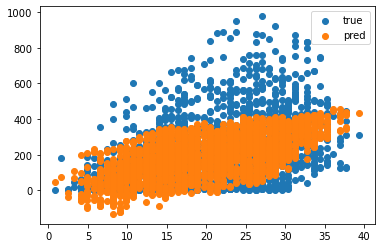

In [29]:
#(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

plt.scatter(X_test["temp"], y_test, label="true")
plt.scatter(X_test["temp"], predictions, label="pred")
plt.legend()
plt.show()

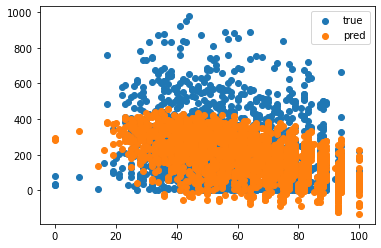

In [30]:
plt.scatter(X_test["humidity"], y_test, label="true")
plt.scatter(X_test["humidity"], predictions, label="pred")
plt.legend()
plt.show()